## Compare Deaths/1000 in various US cities

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
#import covid.csv file
covid = pd.read_csv('../data/covid.csv')
covid.tail()

,City,Deaths per 100000,Deaths/1000,Deaths
37,"Rochester, NY",NaN,NaN,NaN
38,"St. Louis, MO",131.0,1.31,1838.0
39,"St. Paul, MN",NaN,NaN,NaN
40,"San Francisco, CA",39.0,0.39,346.0
41,Total,142.0,1.42,456617.0


In [3]:
#drop rows with nulll values
covid = covid.dropna()
covid.head()

,City,Deaths per 100000,Deaths/1000,Deaths
3,"Baltimore, MD",141.0,1.41,837.0
5,"Boston, MA",199.0,1.99,1603.0
8,"Chicago, IL",175.0,1.75,9024.0
10,"Cleveland, OH",99.0,0.99,1226.0
19,"Los Angeles, CA",179.0,1.79,18044.0


In [4]:
#drop column
covid = covid.drop(columns=['Deaths per 100000','Deaths'])

#rename column
covid=covid.rename(columns = {'Deaths/1000':'COVID-19'})
covid.tail()

,City,COVID-19
32,"Philadelphia, PA",1.88
33,"Pittsburgh, PA",1.31
38,"St. Louis, MO",1.31
40,"San Francisco, CA",0.39
41,Total,1.42


In [5]:
#import spanish flu.csv file
spanish_flu = pd.read_csv('../data/spanish_flu.csv')
spanish_flu.tail()

,City,Population,9/14/1918,9/21/1918,9/28/1918,10/5/1918,10/12/1918,10/19/1918,10/26/1918,11/2/1918,...,1/25/1919,2/1/19191,2/8/1919,2/15/1919,2/22/1919,3/1/1919,3/8/1919,3/15/1919,Total,Deaths/1000
43,"Syracuse, NY",161404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,"Toledo, OH",262234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,"Washington, DC",401681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,"Worchester, MA",173650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Total,21115781.0,68.0,449.0,1453.0,4558.0,11386.0,19939.0,20806.0,14818.0,...,4199.0,3360.0,2586.0,2321.0,1971.0,2352.0,2274.0,2205.0,142631.0,6.754711


In [6]:
#drop rows with nulll values
spanish_flu = spanish_flu.dropna()
spanish_flu.head(10)

,City,Population,9/14/1918,9/21/1918,9/28/1918,10/5/1918,10/12/1918,10/19/1918,10/26/1918,11/2/1918,...,1/25/1919,2/1/19191,2/8/1919,2/15/1919,2/22/1919,3/1/1919,3/8/1919,3/15/1919,Total,Deaths/1000
3,"Baltimore, MD",599653.0,0.0,0.0,0.0,117.0,563.0,1357.0,1073.0,397.0,...,150.0,138.0,126.0,117.0,90.0,66.0,51.0,61.0,5007.0,8.349829
5,"Boston, MA",785245.0,46.0,265.0,775.0,1214.0,1027.0,589.0,226.0,137.0,...,153.0,110.0,89.0,71.0,0.0,70.0,69.0,45.0,6225.0,7.927462
8,"Chicago, IL",2596681.0,16.0,24.0,91.0,417.0,1047.0,2105.0,2367.0,1470.0,...,734.0,277.0,194.0,235.0,233.0,230.0,213.0,232.0,14014.0,5.396889
10,"Cleveland, OH",810306.0,0.0,0.0,0.0,18.0,40.0,158.0,453.0,682.0,...,92.0,108.0,100.0,80.0,0.0,94.0,131.0,132.0,4563.0,5.631206
19,"Los Angeles, CA",568495.0,0.0,0.0,0.0,0.0,69.0,131.0,293.0,382.0,...,177.0,104.0,47.0,21.0,8.0,14.0,8.0,13.0,3184.0,5.600753
25,"Nashville, TN",119215.0,0.0,0.0,0.0,0.0,129.0,193.0,127.0,54.0,...,21.0,17.0,15.0,16.0,23.0,19.0,18.0,11.0,913.0,7.658432
29,"New York, NY",3215879.0,0.0,106.0,191.0,733.0,2121.0,4227.0,5222.0,4402.0,...,1193.0,1212.0,893.0,786.0,788.0,904.0,747.0,695.0,33387.0,10.381920
32,"Philadelphia, PA",1761371.0,0.0,0.0,0.0,706.0,2635.0,4597.0,3021.0,1203.0,...,259.0,308.0,262.0,232.0,231.0,207.0,183.0,164.0,15785.0,8.961769
33,"Pittsburgh, PA",593303.0,0.0,17.0,34.0,69.0,114.0,389.0,576.0,630.0,...,145.0,174.0,145.0,163.0,137.0,134.0,116.0,118.0,5959.0,10.043772
38,"St. Louis, MO",779951.0,0.0,0.0,0.0,0.0,86.0,186.0,233.0,257.0,...,71.0,75.0,53.0,64.0,0.0,81.0,93.0,119.0,3691.0,4.732349


In [7]:
#only keep needed columns
spanish_flu = spanish_flu[['City', 'Deaths/1000']].copy()

#rename columns
spanish_flu=spanish_flu.rename(columns = {'Deaths/1000':'Spanish Flu'}).round(2)
spanish_flu.head(10)

,City,Spanish Flu
3,"Baltimore, MD",8.35
5,"Boston, MA",7.93
8,"Chicago, IL",5.40
10,"Cleveland, OH",5.63
19,"Los Angeles, CA",5.60
25,"Nashville, TN",7.66
29,"New York, NY",10.38
32,"Philadelphia, PA",8.96
33,"Pittsburgh, PA",10.04
38,"St. Louis, MO",4.73


In [8]:
#merge df's
flu_deaths = pd.merge(covid, spanish_flu, on = 'City', how = 'inner')
flu_deaths.head()

,City,COVID-19,Spanish Flu
0,"Baltimore, MD",1.41,8.35
1,"Boston, MA",1.99,7.93
2,"Chicago, IL",1.75,5.40
3,"Cleveland, OH",0.99,5.63
4,"Los Angeles, CA",1.79,5.60


In [9]:
#data = df.reset_index().melt('date', var_name='a', value_name='b')
data = flu_deaths.melt('City', var_name='a', value_name='b')
print (data)

                 City            a      b
0       Baltimore, MD     COVID-19   1.41
1          Boston, MA     COVID-19   1.99
2         Chicago, IL     COVID-19   1.75
3       Cleveland, OH     COVID-19   0.99
4     Los Angeles, CA     COVID-19   1.79
5       Nashville, TN     COVID-19   1.14
6        New York, NY     COVID-19   3.26
7    Philadelphia, PA     COVID-19   1.88
8      Pittsburgh, PA     COVID-19   1.31
9       St. Louis, MO     COVID-19   1.31
10  San Francisco, CA     COVID-19   0.39
11              Total     COVID-19   1.42
12      Baltimore, MD  Spanish Flu   8.35
13         Boston, MA  Spanish Flu   7.93
14        Chicago, IL  Spanish Flu   5.40
15      Cleveland, OH  Spanish Flu   5.63
16    Los Angeles, CA  Spanish Flu   5.60
17      Nashville, TN  Spanish Flu   7.66
18       New York, NY  Spanish Flu  10.38
19   Philadelphia, PA  Spanish Flu   8.96
20     Pittsburgh, PA  Spanish Flu  10.04
21      St. Louis, MO  Spanish Flu   4.73
22  San Francisco, CA  Spanish Flu

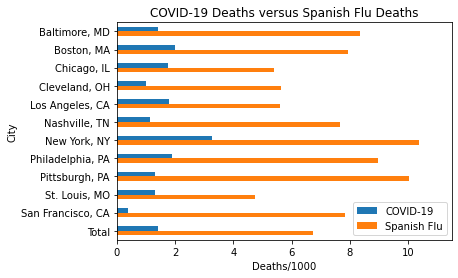

In [15]:
flu_deaths.set_index('City').plot.barh()
plt.title('COVID-19 Deaths versus Spanish Flu Deaths')
plt.xlabel('Deaths/1000')
plt.xlim(0, 11.5)
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.legend(loc = 'lower right');
#plt.yticks(range(len(order)), order);